# Data Analysis

### Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df = pd.read_csv('clean_data.csv')

### Clean data

In [3]:
df.head()


,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science,Unnamed: 13
0,phạm hoàng hương ái,04/11/2002,6.6,-1.00,-1.00,5.2,-1.0,6.25,5.75,7.00,7.25,-1.00,6.67,NaN
1,đặng huỳnh vĩnh an,13/12/2002,8.2,-1.00,-1.00,7.0,-1.0,7.75,7.00,7.25,8.50,-1.00,7.58,NaN
2,lâm nguyễn mộng thùy an,06/04/2001,6.8,-1.00,-1.00,6.0,-1.0,6.75,4.75,7.75,8.25,-1.00,6.92,NaN
3,lê tiêu hoàng an,18/11/2002,7.8,5.50,6.25,5.6,7.0,6.25,-1.00,-1.00,-1.00,6.25,-1.00,NaN
4,lư thuận an,14/01/2002,6.4,6.75,6.25,8.2,5.5,6.50,-1.00,-1.00,-1.00,6.17,-1.00,NaN


#### Drop the last column

In [4]:
df.drop(df.columns[[-1]], axis=1, inplace=True)


In [5]:
df.head()

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,phạm hoàng hương ái,04/11/2002,6.6,-1.00,-1.00,5.2,-1.0,6.25,5.75,7.00,7.25,-1.00,6.67
1,đặng huỳnh vĩnh an,13/12/2002,8.2,-1.00,-1.00,7.0,-1.0,7.75,7.00,7.25,8.50,-1.00,7.58
2,lâm nguyễn mộng thùy an,06/04/2001,6.8,-1.00,-1.00,6.0,-1.0,6.75,4.75,7.75,8.25,-1.00,6.92
3,lê tiêu hoàng an,18/11/2002,7.8,5.50,6.25,5.6,7.0,6.25,-1.00,-1.00,-1.00,6.25,-1.00
4,lư thuận an,14/01/2002,6.4,6.75,6.25,8.2,5.5,6.50,-1.00,-1.00,-1.00,6.17,-1.00


#### Change faulty dates of birth (00/00) to (01/01)

In [6]:
df['dob'] = df['dob'].apply(lambda x: x.replace('00/00', '01/01'))

#### Change DoB to datetime objects

In [7]:
df['dob'] =  pd.to_datetime(df['dob'], format='%d/%m/%Y')

In [8]:
df.head()

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,phạm hoàng hương ái,2002-11-04,6.6,-1.00,-1.00,5.2,-1.0,6.25,5.75,7.00,7.25,-1.00,6.67
1,đặng huỳnh vĩnh an,2002-12-13,8.2,-1.00,-1.00,7.0,-1.0,7.75,7.00,7.25,8.50,-1.00,7.58
2,lâm nguyễn mộng thùy an,2001-04-06,6.8,-1.00,-1.00,6.0,-1.0,6.75,4.75,7.75,8.25,-1.00,6.92
3,lê tiêu hoàng an,2002-11-18,7.8,5.50,6.25,5.6,7.0,6.25,-1.00,-1.00,-1.00,6.25,-1.00
4,lư thuận an,2002-01-14,6.4,6.75,6.25,8.2,5.5,6.50,-1.00,-1.00,-1.00,6.17,-1.00


#### Capitalise name (Note that Vietnamese name has the following format: Family Name - Middle Name(s) - First Name

In [9]:
df['name'] = df['name'].apply(lambda x: x.title())

In [10]:
df.head()

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,-1.00,-1.00,5.2,-1.0,6.25,5.75,7.00,7.25,-1.00,6.67
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,-1.00,-1.00,7.0,-1.0,7.75,7.00,7.25,8.50,-1.00,7.58
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,-1.00,-1.00,6.0,-1.0,6.75,4.75,7.75,8.25,-1.00,6.92
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.0,6.25,-1.00,-1.00,-1.00,6.25,-1.00
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.5,6.50,-1.00,-1.00,-1.00,6.17,-1.00


### Question 1: Which subject is taken by the most number of students ?

In [11]:
df.shape

(74171, 13)

In [12]:
number_of_students = df.shape[0] #74171

number_of_students_not_taking_maths = df[df['math'] == - 1].shape[0]
number_of_students_not_taking_physics = df[df['physics'] == - 1].shape[0]
number_of_students_not_taking_chemistry = df[df['chemistry'] == - 1].shape[0]
number_of_students_not_taking_english = df[df['english'] == - 1].shape[0]
number_of_students_not_taking_biology = df[df['biology'] == - 1].shape[0]
number_of_students_not_taking_literature = df[df['literature'] == - 1].shape[0]
number_of_students_not_taking_history = df[df['history'] == - 1].shape[0]
number_of_students_not_taking_geography = df[df['geography'] == - 1].shape[0]
number_of_students_not_taking_civic_education = df[df['civic education'] == - 1].shape[0]
number_of_students_not_taking_natural_science = df[df['natural science'] == - 1].shape[0]
number_of_students_not_taking_social_science = df[df['social science'] == - 1].shape[0]

In [13]:
df.columns

Index(['name', 'dob', 'math', 'physics', 'chemistry', 'english', 'biology',
       'literature', 'history', 'geography', 'civic education',
       'natural science', 'social science'],
      dtype='object')

In [14]:
subject_lists = df.columns[2:]
subject_lists

Index(['math', 'physics', 'chemistry', 'english', 'biology', 'literature',
       'history', 'geography', 'civic education', 'natural science',
       'social science'],
      dtype='object')

In [15]:
not_taking_students = [df[df[i] == - 1].shape[0] for i in subject_lists]
not_taking_students

[250, 31428, 31143, 8637, 31675, 1803, 44021, 44737, 49097, 32329, 49114]

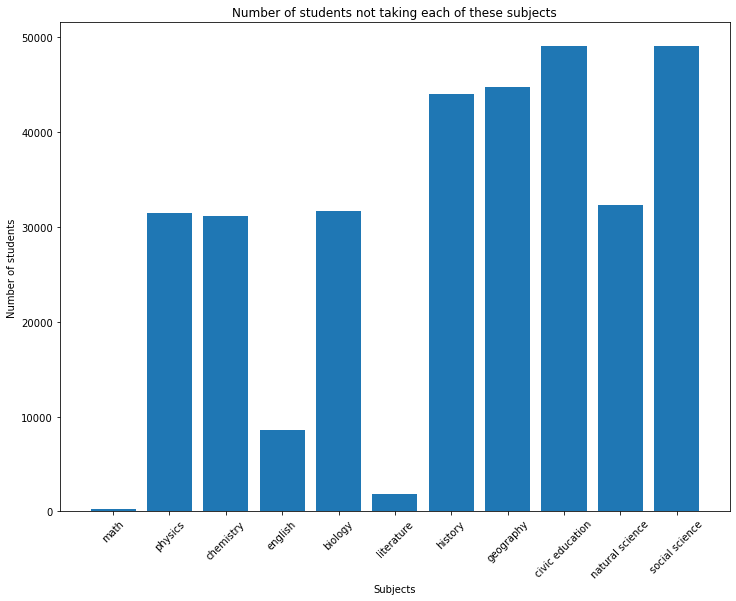

In [16]:
fig, ax = plt.subplots(figsize=(12,9))
plt.bar(subject_lists, not_taking_students)
plt.xticks(rotation=45)
plt.title("Number of students not taking each of these subjects")
plt.xlabel("Subjects")
plt.ylabel("Number of students")
plt.show()

In [17]:
taking_students = [number_of_students - i for i in not_taking_students]

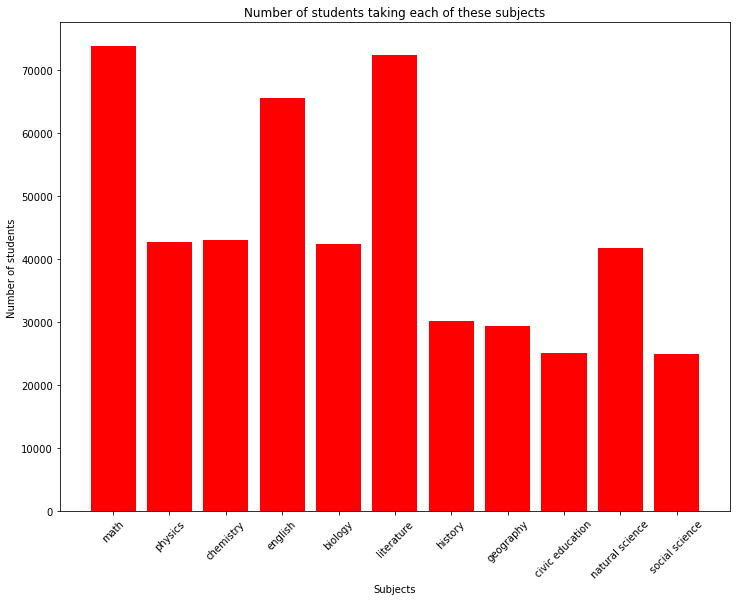

In [18]:
fig, ax = plt.subplots(figsize=(12,9))
plt.bar(subject_lists, taking_students, color='red')
plt.xticks(rotation=45)
plt.title("Number of students taking each of these subjects")
plt.xlabel("Subjects")
plt.ylabel("Number of students")
plt.show()

### Question 2: How many subjects are taken by what percentage of students ?

In [19]:
df.head()

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,-1.00,-1.00,5.2,-1.0,6.25,5.75,7.00,7.25,-1.00,6.67
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,-1.00,-1.00,7.0,-1.0,7.75,7.00,7.25,8.50,-1.00,7.58
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,-1.00,-1.00,6.0,-1.0,6.75,4.75,7.75,8.25,-1.00,6.92
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.0,6.25,-1.00,-1.00,-1.00,6.25,-1.00
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.5,6.50,-1.00,-1.00,-1.00,6.17,-1.00


In [20]:
df_copy = df.copy()

In [21]:
df_copy

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,-1.00,-1.00,5.2,-1.00,6.25,5.75,7.00,7.25,-1.00,6.67
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,-1.00,-1.00,7.0,-1.00,7.75,7.00,7.25,8.50,-1.00,7.58
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,-1.00,-1.00,6.0,-1.00,6.75,4.75,7.75,8.25,-1.00,6.92
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.00,6.25,-1.00,-1.00,-1.00,6.25,-1.00
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.50,6.50,-1.00,-1.00,-1.00,6.17,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,5.4,3.50,5.00,-1.0,5.50,5.92,-1.00,-1.00,-1.00,4.67,-1.00
74167,Nguyễn Thị Hải Yến,2002-05-05,8.6,8.25,8.75,6.2,6.75,7.00,-1.00,-1.00,-1.00,7.92,-1.00
74168,Nguyễn Trần Tiểu Yến,2002-10-07,9.2,8.75,8.50,6.2,8.25,7.50,-1.00,-1.00,-1.00,8.50,-1.00
74169,Phạm Thị Kim Yến,2002-11-20,9.0,8.00,9.25,7.0,6.75,7.00,-1.00,-1.00,-1.00,8.00,-1.00


In [22]:
df1 = pd.DataFrame(columns=df.columns)
df1[['name', 'dob']] = df[['name', 'dob']]

In [23]:
def count(x):
    if x == -1:
        return 0
    else:
        return 1

In [24]:
for subject in subject_lists:
    df1[subject] = df[subject].apply(lambda x: count(x))

In [25]:
df1

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,Phạm Hoàng Hương Ái,2002-11-04,1,0,0,1,0,1,1,1,1,0,1
1,Đặng Huỳnh Vĩnh An,2002-12-13,1,0,0,1,0,1,1,1,1,0,1
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,1,0,0,1,0,1,1,1,1,0,1
3,Lê Tiêu Hoàng An,2002-11-18,1,1,1,1,1,1,0,0,0,1,0
4,Lư Thuận An,2002-01-14,1,1,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,1,1,1,0,1,1,0,0,0,1,0
74167,Nguyễn Thị Hải Yến,2002-05-05,1,1,1,1,1,1,0,0,0,1,0
74168,Nguyễn Trần Tiểu Yến,2002-10-07,1,1,1,1,1,1,0,0,0,1,0
74169,Phạm Thị Kim Yến,2002-11-20,1,1,1,1,1,1,0,0,0,1,0


In [26]:
df1["no of subjects"] = df1.iloc[:,2:].sum(axis=1)
df1

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science,no of subjects
0,Phạm Hoàng Hương Ái,2002-11-04,1,0,0,1,0,1,1,1,1,0,1,7
1,Đặng Huỳnh Vĩnh An,2002-12-13,1,0,0,1,0,1,1,1,1,0,1,7
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,1,0,0,1,0,1,1,1,1,0,1,7
3,Lê Tiêu Hoàng An,2002-11-18,1,1,1,1,1,1,0,0,0,1,0,7
4,Lư Thuận An,2002-01-14,1,1,1,1,1,1,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,1,1,1,0,1,1,0,0,0,1,0,6
74167,Nguyễn Thị Hải Yến,2002-05-05,1,1,1,1,1,1,0,0,0,1,0,7
74168,Nguyễn Trần Tiểu Yến,2002-10-07,1,1,1,1,1,1,0,0,0,1,0,7
74169,Phạm Thị Kim Yến,2002-11-20,1,1,1,1,1,1,0,0,0,1,0,7


In [27]:
dfg = df1.groupby('no of subjects').size()
dfg

no of subjects
1        80
2       120
3      2602
4      4331
5       297
6      2479
7     64261
11        1
dtype: int64

In [29]:
number_of_subjects_taken = dfg.index.to_numpy()
corresponding_number_of_students = dfg['no_of_students'].to_numpy()

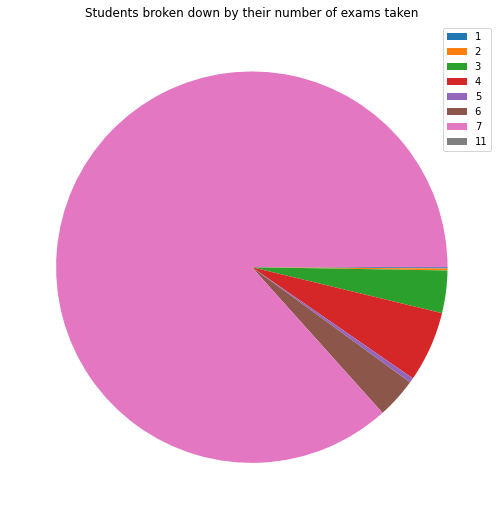

In [30]:
fig1, ax1 = plt.subplots(figsize=(12, 9))
ax1.pie(corresponding_number_of_students, counterclock=False)
plt.legend(number_of_subjects_taken, loc='best')
plt.title("Students broken down by their number of exams taken")
plt.show()

### Question 3: What are the mean scores of each subject (Mean score of math, physics, chemistry,...)

In [31]:
df

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,-1.00,-1.00,5.2,-1.00,6.25,5.75,7.00,7.25,-1.00,6.67
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,-1.00,-1.00,7.0,-1.00,7.75,7.00,7.25,8.50,-1.00,7.58
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,-1.00,-1.00,6.0,-1.00,6.75,4.75,7.75,8.25,-1.00,6.92
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.00,6.25,-1.00,-1.00,-1.00,6.25,-1.00
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.50,6.50,-1.00,-1.00,-1.00,6.17,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,5.4,3.50,5.00,-1.0,5.50,5.92,-1.00,-1.00,-1.00,4.67,-1.00
74167,Nguyễn Thị Hải Yến,2002-05-05,8.6,8.25,8.75,6.2,6.75,7.00,-1.00,-1.00,-1.00,7.92,-1.00
74168,Nguyễn Trần Tiểu Yến,2002-10-07,9.2,8.75,8.50,6.2,8.25,7.50,-1.00,-1.00,-1.00,8.50,-1.00
74169,Phạm Thị Kim Yến,2002-11-20,9.0,8.00,9.25,7.0,6.75,7.00,-1.00,-1.00,-1.00,8.00,-1.00


In [32]:
for subject in subject_lists:
    df[subject] = df[subject].apply(lambda x: None if (x==-1) else x)

In [33]:
df

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,NaN,NaN,5.2,NaN,6.25,5.75,7.00,7.25,NaN,6.67
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,NaN,NaN,7.0,NaN,7.75,7.00,7.25,8.50,NaN,7.58
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,NaN,NaN,6.0,NaN,6.75,4.75,7.75,8.25,NaN,6.92
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.00,6.25,NaN,NaN,NaN,6.25,NaN
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.50,6.50,NaN,NaN,NaN,6.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,5.4,3.50,5.00,NaN,5.50,5.92,NaN,NaN,NaN,4.67,NaN
74167,Nguyễn Thị Hải Yến,2002-05-05,8.6,8.25,8.75,6.2,6.75,7.00,NaN,NaN,NaN,7.92,NaN
74168,Nguyễn Trần Tiểu Yến,2002-10-07,9.2,8.75,8.50,6.2,8.25,7.50,NaN,NaN,NaN,8.50,NaN
74169,Phạm Thị Kim Yến,2002-11-20,9.0,8.00,9.25,7.0,6.75,7.00,NaN,NaN,NaN,8.00,NaN


In [70]:
mean_score_by_subjects = []
for subject in subject_lists:
    mean_score_by_subjects.append(df[subject].mean(skipna=True))
mean_score_by_subjects

[7.3597435099633275,
 6.578948599770722,
 6.614739239564934,
 5.847941526535846,
 5.650096479668675,
 6.74176583572849,
 5.374676616915423,
 6.863227899707821,
 8.316582914572864,
 6.271306820897601,
 6.886191483417797]

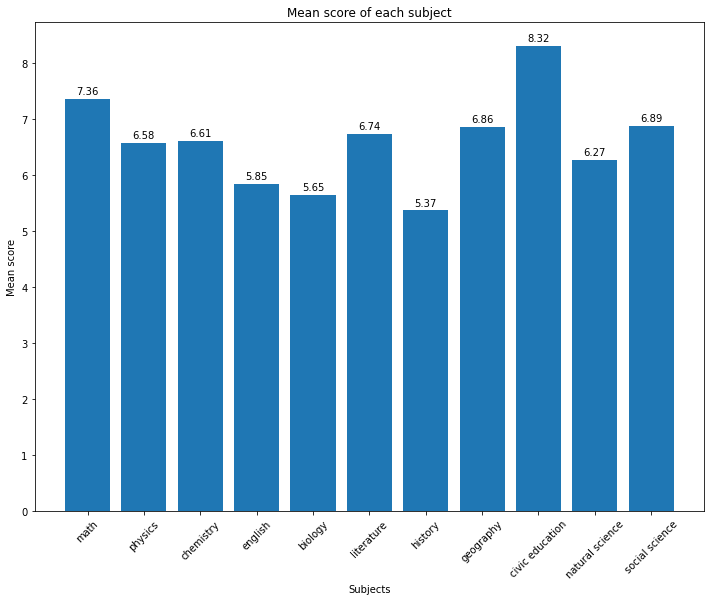

In [73]:
fig, ax = plt.subplots(figsize=(12,9))
bars = plt.bar(subject_lists, mean_score_by_subjects)
plt.title("Mean score of each subject")
plt.xlabel("Subjects")
plt.ylabel("Mean score")
plt.xticks(rotation=45)
# access the bar attributes to place the text in the appropriate location
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + .05, round(bar.get_height(),2), ha='center', va='bottom')

### Question 4: What are the mean scores of students grouped by their number of subjects(exams) taken ?

In [35]:
df["no of subjects"] = df1['no of subjects']

In [36]:
df['avg score'] = df.iloc[:,2:13].sum(axis=1, skipna=True) / df['no of subjects']

In [37]:
df

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science,no of subjects,avg score
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,NaN,NaN,5.2,NaN,6.25,5.75,7.00,7.25,NaN,6.67,7,6.388571
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,NaN,NaN,7.0,NaN,7.75,7.00,7.25,8.50,NaN,7.58,7,7.611429
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,NaN,NaN,6.0,NaN,6.75,4.75,7.75,8.25,NaN,6.92,7,6.745714
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.00,6.25,NaN,NaN,NaN,6.25,NaN,7,6.378571
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.50,6.50,NaN,NaN,NaN,6.17,NaN,7,6.538571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,5.4,3.50,5.00,NaN,5.50,5.92,NaN,NaN,NaN,4.67,NaN,6,4.998333
74167,Nguyễn Thị Hải Yến,2002-05-05,8.6,8.25,8.75,6.2,6.75,7.00,NaN,NaN,NaN,7.92,NaN,7,7.638571
74168,Nguyễn Trần Tiểu Yến,2002-10-07,9.2,8.75,8.50,6.2,8.25,7.50,NaN,NaN,NaN,8.50,NaN,7,8.128571
74169,Phạm Thị Kim Yến,2002-11-20,9.0,8.00,9.25,7.0,6.75,7.00,NaN,NaN,NaN,8.00,NaN,7,7.857143


In [38]:
(6.6 + 5.2 + 6.25 + 5.75 + 7 + 7.25 + 6.67)/7

6.388571428571429

In [39]:
dfg = df.groupby('no of subjects').mean()['avg score']
dfg

no of subjects
1     5.679000
2     6.906792
3     6.585012
4     5.818145
5     6.504727
6     6.571043
7     6.595611
11    4.266364
Name: avg score, dtype: float64

In [40]:
type(dfg)

pandas.core.series.Series

In [41]:
dfg.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 11], dtype='int64', name='no of subjects')

In [42]:
mean_scores_by_no_of_subjects = [dfg[i] for i in dfg.index]

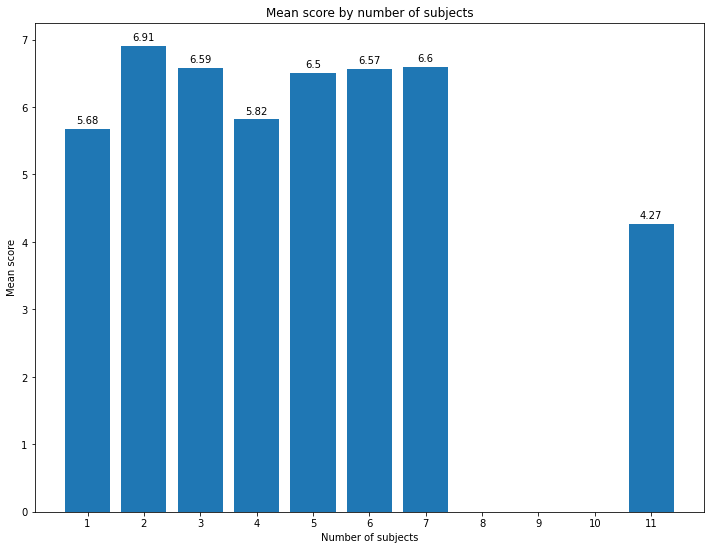

In [43]:
fig, ax = plt.subplots(figsize=(12,9))
bars = plt.bar(dfg.index, mean_scores_by_no_of_subjects)
plt.title("Mean score by number of subjects")
plt.xlabel("Number of subjects")
plt.ylabel("Mean score")
plt.xticks(range(1,12))
# access the bar attributes to place the text in the appropriate location
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + .05, round(bar.get_height(),2), ha='center', va='bottom')

### Question 5: What is the number of students for each age group ?

In [44]:
df

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science,no of subjects,avg score
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,NaN,NaN,5.2,NaN,6.25,5.75,7.00,7.25,NaN,6.67,7,6.388571
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,NaN,NaN,7.0,NaN,7.75,7.00,7.25,8.50,NaN,7.58,7,7.611429
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,NaN,NaN,6.0,NaN,6.75,4.75,7.75,8.25,NaN,6.92,7,6.745714
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.00,6.25,NaN,NaN,NaN,6.25,NaN,7,6.378571
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.50,6.50,NaN,NaN,NaN,6.17,NaN,7,6.538571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,5.4,3.50,5.00,NaN,5.50,5.92,NaN,NaN,NaN,4.67,NaN,6,4.998333
74167,Nguyễn Thị Hải Yến,2002-05-05,8.6,8.25,8.75,6.2,6.75,7.00,NaN,NaN,NaN,7.92,NaN,7,7.638571
74168,Nguyễn Trần Tiểu Yến,2002-10-07,9.2,8.75,8.50,6.2,8.25,7.50,NaN,NaN,NaN,8.50,NaN,7,8.128571
74169,Phạm Thị Kim Yến,2002-11-20,9.0,8.00,9.25,7.0,6.75,7.00,NaN,NaN,NaN,8.00,NaN,7,7.857143


In [45]:
df['age'] = df['dob'].apply(lambda x: 2020 - x.year)

In [46]:
df

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science,no of subjects,avg score,age
0,Phạm Hoàng Hương Ái,2002-11-04,6.6,NaN,NaN,5.2,NaN,6.25,5.75,7.00,7.25,NaN,6.67,7,6.388571,18
1,Đặng Huỳnh Vĩnh An,2002-12-13,8.2,NaN,NaN,7.0,NaN,7.75,7.00,7.25,8.50,NaN,7.58,7,7.611429,18
2,Lâm Nguyễn Mộng Thùy An,2001-04-06,6.8,NaN,NaN,6.0,NaN,6.75,4.75,7.75,8.25,NaN,6.92,7,6.745714,19
3,Lê Tiêu Hoàng An,2002-11-18,7.8,5.50,6.25,5.6,7.00,6.25,NaN,NaN,NaN,6.25,NaN,7,6.378571,18
4,Lư Thuận An,2002-01-14,6.4,6.75,6.25,8.2,5.50,6.50,NaN,NaN,NaN,6.17,NaN,7,6.538571,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74166,Nguyễn Đình Hải Yến,2002-11-10,5.4,3.50,5.00,NaN,5.50,5.92,NaN,NaN,NaN,4.67,NaN,6,4.998333,18
74167,Nguyễn Thị Hải Yến,2002-05-05,8.6,8.25,8.75,6.2,6.75,7.00,NaN,NaN,NaN,7.92,NaN,7,7.638571,18
74168,Nguyễn Trần Tiểu Yến,2002-10-07,9.2,8.75,8.50,6.2,8.25,7.50,NaN,NaN,NaN,8.50,NaN,7,8.128571,18
74169,Phạm Thị Kim Yến,2002-11-20,9.0,8.00,9.25,7.0,6.75,7.00,NaN,NaN,NaN,8.00,NaN,7,7.857143,18


In [47]:
df_older_than_26 = df[df['age'] > 26]
df_older_than_26

,name,dob,math,physics,chemistry,english,biology,literature,history,geography,civic education,natural science,social science,no of subjects,avg score,age
32849,Dương Hồng Phúc,1991-10-15,7.0,NaN,NaN,NaN,NaN,6.75,6.50,7.75,NaN,NaN,NaN,4,7.000000,29
45980,Huỳnh Tuấn Anh,1986-11-14,8.8,7.00,NaN,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7.066667,34
46043,Sơn Hoài Ân,1991-04-25,6.8,5.75,5.25,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6.450000,29
46047,Phạm Thị Y Ban,1991-10-07,7.6,NaN,NaN,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN,2,7.050000,29
46080,Lê Mạch Hoàn Châu,1991-09-09,5.2,NaN,NaN,NaN,NaN,4.25,2.75,5.25,NaN,NaN,NaN,4,4.362500,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73181,Hoàng Thị Kim Loan,1984-08-20,NaN,NaN,NaN,NaN,NaN,8.00,8.75,7.75,NaN,NaN,NaN,3,8.166667,36
73575,Hoàng Anh Thuận,1991-01-02,6.6,NaN,6.75,5.6,7.00,NaN,NaN,NaN,NaN,NaN,NaN,4,6.487500,29
73634,Mai Minh Tùng,1978-02-21,2.6,NaN,NaN,NaN,NaN,5.00,2.75,4.25,NaN,NaN,NaN,4,3.650000,42
73932,Trần Thị Thùy Trang,1984-10-08,6.4,NaN,7.00,NaN,6.75,NaN,NaN,NaN,NaN,NaN,NaN,3,6.716667,36


In [48]:
mean_score_older_than_26 = df_older_than_26['avg score'].mean()
mean_score_older_than_26

6.164864543114543

In [49]:
count_26_older = 0
for age in df['age']:
    if age > 26:
        count_26_older += 1
count_26_older

296

In [50]:
dfg = df.groupby('age').mean()['avg score']
dfg

age
17    7.953571
18    6.587884
19    6.319129
20    6.276502
21    6.026032
22    5.987638
23    5.945985
24    5.798368
25    6.069724
26    5.911239
27    6.190845
28    6.598553
29    6.480566
30    6.318075
31    6.428159
32    6.503804
33    5.858712
34    5.580417
35    6.694167
36    6.285000
37    5.682813
38    5.254167
39    4.808889
40    5.150000
41    4.793750
42    4.629167
43    6.612500
44    6.783333
45    6.312500
46    5.160500
47    2.975000
48    2.450000
49    3.700000
51    3.850000
55    7.266667
56    5.560000
57    6.250000
Name: avg score, dtype: float64

In [51]:
dfg.index[0:10]
dfg_avg_score_dict = {}
for age in dfg.index[0:10]:
    dfg_avg_score_dict[str(age)] = dfg[age]
dfg_avg_score_dict

{'17': 7.953571428571427,
 '18': 6.587883588233329,
 '19': 6.31912913939783,
 '20': 6.276502392916972,
 '21': 6.026032408269695,
 '22': 5.987638008205893,
 '23': 5.9459850294632925,
 '24': 5.798367926542815,
 '25': 6.069723567393057,
 '26': 5.911239405854082}

In [52]:
dfg_avg_score_dict['>26'] = mean_score_older_than_26

In [53]:
dfg_avg_score_dict

{'17': 7.953571428571427,
 '18': 6.587883588233329,
 '19': 6.31912913939783,
 '20': 6.276502392916972,
 '21': 6.026032408269695,
 '22': 5.987638008205893,
 '23': 5.9459850294632925,
 '24': 5.798367926542815,
 '25': 6.069723567393057,
 '26': 5.911239405854082,
 '>26': 6.164864543114543}

In [54]:
dfg = df.groupby('age').size()
dfg.index[0:10]
dfg_age_dict = {}
for age in dfg.index[0:10]:
    dfg_age_dict[str(age)] = dfg[age]
dfg_age_dict

{'17': 2,
 '18': 66067,
 '19': 4455,
 '20': 1393,
 '21': 767,
 '22': 383,
 '23': 299,
 '24': 223,
 '25': 177,
 '26': 109}

In [55]:
dfg_age_dict['>26'] = count_26_older
dfg_age_dict

{'17': 2,
 '18': 66067,
 '19': 4455,
 '20': 1393,
 '21': 767,
 '22': 383,
 '23': 299,
 '24': 223,
 '25': 177,
 '26': 109,
 '>26': 296}

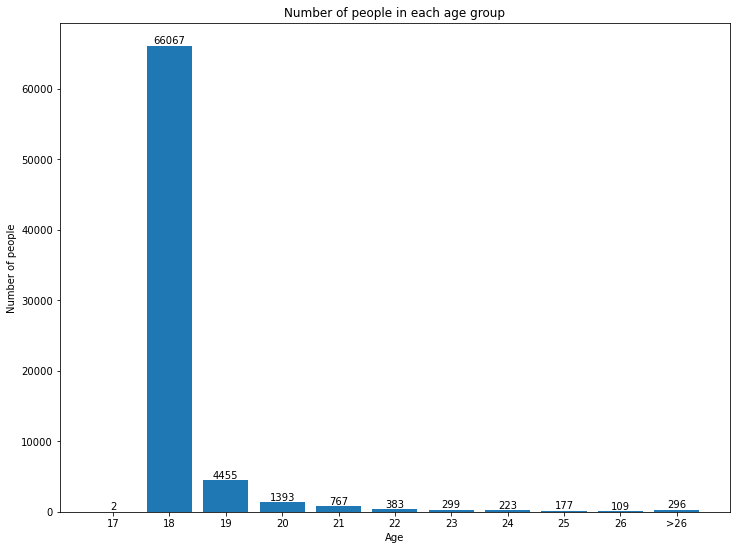

In [56]:
plt.figure(figsize=(12,9))
bars = plt.bar(dfg_age_dict.keys(), dfg_age_dict.values())
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Number of people in each age group")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')
plt.show()

###  Question 6: Top 20 last names and first names ?

#### Top 20 first names

In [57]:
lastnames = [name.split(" ")[0] for name in df['name']]

In [58]:
name_df = pd.DataFrame(lastnames, columns=['last name'])
name_df

,last name
0,Phạm
1,Đặng
2,Lâm
3,Lê
4,Lư
...,...
74166,Nguyễn
74167,Nguyễn
74168,Nguyễn
74169,Phạm


In [59]:
name_df['last name'].value_counts().sort_values(ascending=False)

Nguyễn    23136
Trần       7911
Lê         6347
Phạm       4377
Huỳnh      2656
          ...  
Hiệp          1
Safiy         1
Kan           1
Lềng          1
Giản          1
Name: last name, Length: 603, dtype: int64

In [60]:
name_df['first name'] = df['name'].apply(lambda x: x.split(" ")[-1])
name_df

,last name,first name
0,Phạm,Ái
1,Đặng,An
2,Lâm,An
3,Lê,An
4,Lư,An
...,...,...
74166,Nguyễn,Yến
74167,Nguyễn,Yến
74168,Nguyễn,Yến
74169,Phạm,Yến


In [61]:
first_name_by_popularity = name_df['first name'].value_counts().sort_values(ascending=False)
first_name_by_popularity

Anh       2907
Vy        1813
Nhi       1650
Huy       1594
Linh      1481
          ... 
Quynh        1
Bối          1
Seyuki       1
Đĩnh         1
Linda        1
Name: first name, Length: 993, dtype: int64

In [62]:
top_20_names = first_name_by_popularity[0:20]

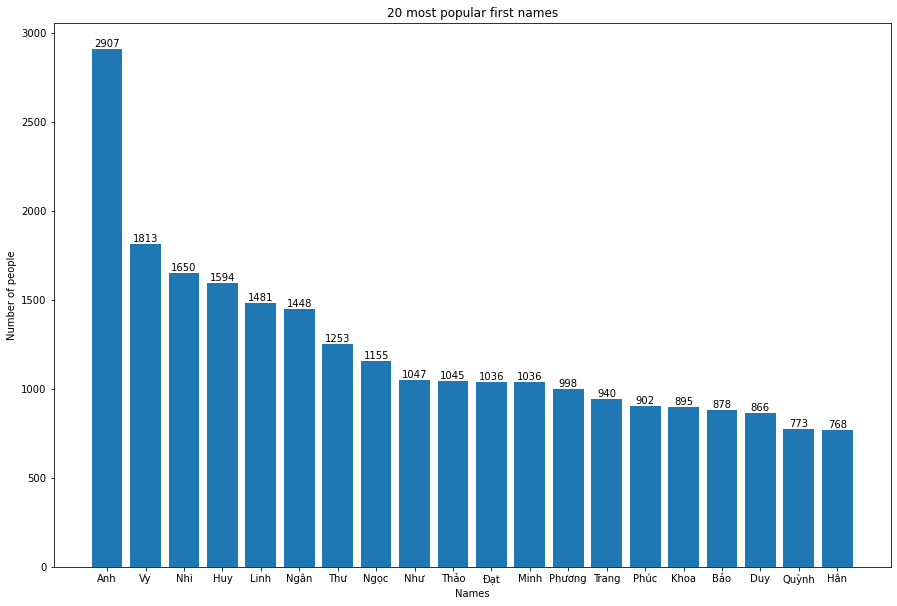

In [63]:
plt.figure(figsize=(15,10))
bars = plt.bar(top_20_names.index, top_20_names)
plt.xlabel("Names")
plt.ylabel("Number of people")
plt.title("20 most popular first names")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')
plt.show()

#### Top 20 last names

In [64]:
last_name_by_popularity = name_df['last name'].value_counts().sort_values(ascending=False)
top_20_last_names = last_name_by_popularity[0:20]

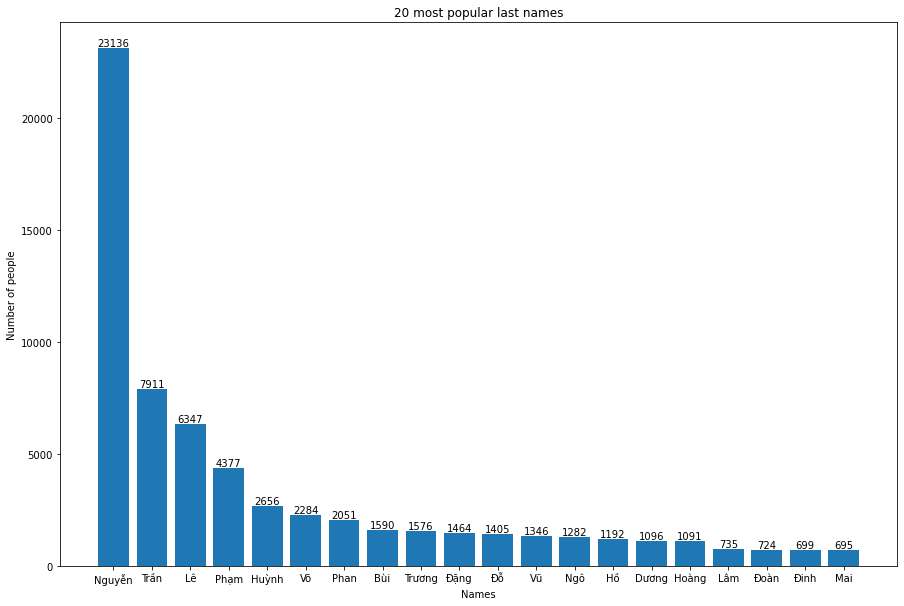

In [65]:
plt.figure(figsize=(15,10))
bars = plt.bar(top_20_last_names.index, top_20_last_names)
plt.xlabel("Names")
plt.ylabel("Number of people")
plt.title("20 most popular last names")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')
plt.show()

### Longest name

In [66]:
name_df['full name'] = df['name']
name_df

,last name,first name,full name
0,Phạm,Ái,Phạm Hoàng Hương Ái
1,Đặng,An,Đặng Huỳnh Vĩnh An
2,Lâm,An,Lâm Nguyễn Mộng Thùy An
3,Lê,An,Lê Tiêu Hoàng An
4,Lư,An,Lư Thuận An
...,...,...,...
74166,Nguyễn,Yến,Nguyễn Đình Hải Yến
74167,Nguyễn,Yến,Nguyễn Thị Hải Yến
74168,Nguyễn,Yến,Nguyễn Trần Tiểu Yến
74169,Phạm,Yến,Phạm Thị Kim Yến


In [67]:
name_df['length'] = name_df['full name'].apply(lambda x: len(x))
name_df

,last name,first name,full name,length
0,Phạm,Ái,Phạm Hoàng Hương Ái,19
1,Đặng,An,Đặng Huỳnh Vĩnh An,18
2,Lâm,An,Lâm Nguyễn Mộng Thùy An,23
3,Lê,An,Lê Tiêu Hoàng An,16
4,Lư,An,Lư Thuận An,11
...,...,...,...,...
74166,Nguyễn,Yến,Nguyễn Đình Hải Yến,19
74167,Nguyễn,Yến,Nguyễn Thị Hải Yến,18
74168,Nguyễn,Yến,Nguyễn Trần Tiểu Yến,20
74169,Phạm,Yến,Phạm Thị Kim Yến,16


In [68]:
name_df['length'].max()

31

In [69]:
name_df.loc[name_df['length'] == name_df['length'].max()]['full name']

4945     Nguyễn Xuân Quỳnh Giao - Rosafi
33071    Đoàn Huỳnh Nguyễn Châu Thanh Tú
Name: full name, dtype: object